# Sales Product Data Analysis

## 1. Executive Summary

The XYZ company is an online retailer platform where people can order their product online. The company is mostly selling electronics such as phones, batteries, laptops and more. The aim of this project is to generate useful insights from sales data, trends, and metrics to set targets and forecast sales performance. We want to provide insights about the top performing products, identify the problems in selling and market opportunities, sales, forecasting, and sales activities that generate revenue. Therefore, our manager wants us to do some analysis and present him a report based on the following questions:

* How much was earned in the year 2019?
* What was the best month for sales? How much was earned that month?
* What city had the highest number of sales?
* What time should we display advertisement to maximize likelihood of customer's buying product?
* What products are most often sold together?
* What product sold the most? Why do you think it sold the most?



## 2. The Data

### 2.1 About the dataset

Data source: [kaggle](https://www.kaggle.com/datasets/knightbearr/sales-product-data?resource=download)

* **Order ID** - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
* **Product** - The product that have been sold.
* **Quantity Ordered** - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
* **Price Each** - The price of each products.
* **Order Date** - This is the date the customer is requesting the order be shipped.
* **Purchase Address** - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.

### 2.2 Data Validation

The dataset contains **186,850 rows** and **6 columns** with missing values before cleaning. This dataset is from 2019 product sales and each month data is stored separately into a csv file. Each row represent one order, which can contain more than one product that has been purchased. I validated all the columns against the criteria in the dataset table:

I replaced the space " " in the column names with an underscore "_".

* Order ID: 545 missing values plus 355 values where the title was inputed as the value. Therefore, we had a total of 900 missing values, I decided to remove all of these because this was the case for all the remaining columns. I also changed the data type from object to integer, the IDs are numbers.
* Product: 900 missing values. I remove all of them as I did in the previous column.
* Quantity Ordered: 900 missing values. I decided to remove them. I also changed the data type to integer.
* Price Each: 900 missing values removed and changed the data type from object to float.
* Order Date: I remove the 900 missing values and changed the data type to Datetime. I also separated the column into month, day, hour, and minute columns.
* Purchase Address: 900 missing values removed. I extracted the city names from the customer addresses.


After data validation the dataset contains **185,950 rows** and **11 columns**.


## 3. Data Preparation

### 3.1 Loading & Cleaning the Data

### Original Data

In [1]:
# importing different Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
# Load the data

# All the monthly data
january_sales = pd.read_csv("Sales_January_2019.csv")
february_sales = pd.read_csv("Sales_February_2019.csv")
march_sales = pd.read_csv("Sales_March_2019.csv")
april_sales = pd.read_csv("Sales_April_2019.csv")
may_sales = pd.read_csv("Sales_May_2019.csv")
june_sales = pd.read_csv("Sales_June_2019.csv")
july_sales = pd.read_csv("Sales_July_2019.csv")
august_sales = pd.read_csv("Sales_August_2019.csv")
september_sales = pd.read_csv("Sales_September_2019.csv")
october_sales = pd.read_csv("Sales_October_2019.csv")
november_sales = pd.read_csv("Sales_November_2019.csv")
december_sales = pd.read_csv("Sales_December_2019.csv")

# Concatenate the data into one DataFrame
sales = pd.concat([january_sales, february_sales, march_sales, april_sales, may_sales, june_sales, july_sales, august_sales, september_sales, october_sales, november_sales, december_sales], ignore_index=True)

sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
# Print the summary info of the data
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### After removing all the missing values for all the columns

In [7]:
# column names inserted as values
sales[sales["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184931,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
# change these values to null values
for col in sales.columns:
    sales.loc[sales[col] == col, col] = np.nan
    
# check for those rows again
sales[sales["Order ID"] == "Order ID"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
# count missing values
sales.isnull().sum()

Order ID            900
Product             900
Quantity Ordered    900
Price Each          900
Order Date          900
Purchase Address    900
dtype: int64

In [13]:
# remove missing values
sales_clean = sales.dropna()

# Check for missing values
sales_clean.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [15]:
# Inspecting the data with info
sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity_Ordered  185950 non-null  object
 3   Price_Each        185950 non-null  object
 4   Order_Date        185950 non-null  object
 5   Purchase_Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### After changing the datatype and modify the column names

In [14]:
# Replacing the spaces in the column names with underscores
sales_clean.columns = [i.replace(" ", "_") for i in sales_clean.columns]

sales_clean.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [17]:
# Fixing the data types
sales_clean["Order_ID"] = sales_clean["Order_ID"].astype("int")
sales_clean["Quantity_Ordered"] = sales_clean["Quantity_Ordered"].astype("int")
sales_clean["Price_Each"] = sales_clean["Price_Each"].astype("float")
sales_clean["Order_Date"] = pd.to_datetime(sales_clean["Order_Date"])

sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity_Ordered  185950 non-null  int64         
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


### After separating the Order Date column and Extracting city names

In [18]:
# Separating the Order Date column
sales_clean["Month"] = sales_clean["Order_Date"].dt.month_name()
sales_clean["Day"] = sales_clean["Order_Date"].dt.day_name()
sales_clean["Hour"] = sales_clean["Order_Date"].dt.hour
sales_clean["Minute"] = sales_clean["Order_Date"].dt.minute

# Extract the cities
sales_clean["City"] = [i.split(",")[1] for i in sales_clean["Purchase_Address"]]

# Show the shape of the data and preview
print(sales_clean.shape)

sales_clean.head(2)

(185950, 11)


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Day,Hour,Minute,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",January,Tuesday,21,25,Boston
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",January,Monday,14,15,Portland


## 4. Exploratory Analysis

## How much was earned in the year 2019?

In 2019, the company made a total revenue of **34,492,035 US dollars**.

In [19]:
# Total Revenue
total_revenue = sum(sales_clean["Quantity_Ordered"] * sales_clean["Price_Each"])

# Print the result
print("The total Revenue of the year 2019 was: $ {}".format(round(total_revenue, 2)))

The total Revenue of the year 2019 was: $ 34492035.97


## Which month was the best of the year 2019?

The month of **December** was the best in the year 2019 with a total revenue of **4,613K usd**. We can also observe that January was our weakest month with only **1,822K usd** in revenue. See the graph below. We also see an increase in sales from January at the beginning of the year (when it is low) to December at the end of the year (when it is high). We can also see that there is a peak in April (sales increased from February to April) while in summer our sales dropped, then increased from September to October, decreased a little in November to finally increasing to the highest peak in December. Therefore, we can conclude that the best moments of the year where we can maximize our revenue are February to April, and September to December.

In [26]:
# Revenue
sales_clean["Revenue"] = sales_clean["Quantity_Ordered"] * sales_clean["Price_Each"]

# Total Revenue by Month
revenue_by_month = pd.DataFrame(sales_clean.groupby(sales_clean["Order_Date"].dt.month)["Revenue"].agg(np.sum))
revenue_by_month["Month"] = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Rename the column of the groupby
revenue_by_month.rename(columns={"Revenue": "Total_Revenue"}, inplace=True)

# Print the result
revenue_by_month

,Total_Revenue,Month
Order_Date,,
1,1822256.73,Jan
2,2202022.42,Feb
3,2807100.38,Mar
4,3390670.24,Apr
5,3152606.75,May
6,2577802.26,Jun
7,2647775.76,Jul
8,2244467.88,Aug
9,2097560.13,Sep


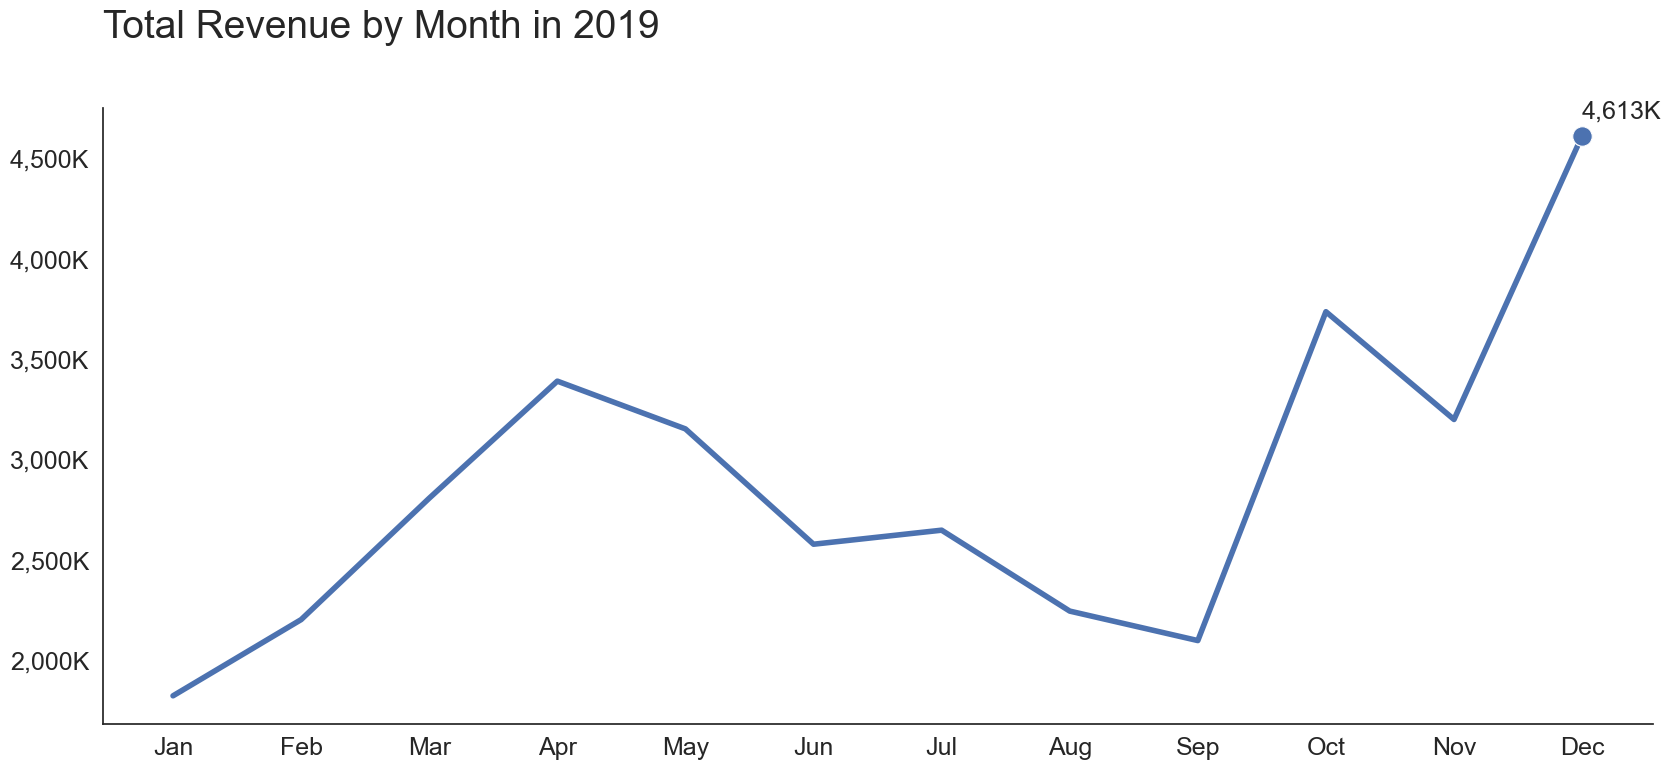

In [31]:

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.set()
sns.set_style("white")

fig, ax = plt.subplots(figsize=(20, 8))

ax = sns.lineplot(x=revenue_by_month.index, y="Total_Revenue", data=revenue_by_month, marker="o",
                 ms=14, markevery=[-1, -1], ci=None, linewidth=4)
sns.despine()
ax.set_title("Total Revenue by Month in 2019", loc="left", fontsize=28, y=1.10)
ylabels = ["{:,.0f}".format(round(y)) + "K" for y in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(months)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("")
plt.ylabel("")

plt.annotate("{:,.0f}".format(revenue_by_month.loc[max(revenue_by_month.index), "Total_Revenue"]/1000) + "K",
            xy=(max(revenue_by_month.index), revenue_by_month.loc[max(revenue_by_month.index), "Total_Revenue"]+90000),
            fontsize=18)

plt.show()

## What City had the highest revenue?

**San Francisco** was the best city with the highest revenue of **8,262K USD**, followed by Los Angeles and New York City with 5,452K USD and 4,664K USD respectively. We also found that Austin had the least revenue.

In [32]:
# Total Revenue by City
revenue_by_city = sales_clean.pivot_table(values='Revenue', index='City', aggfunc=np.sum).sort_values(by='Revenue', ascending=False)

revenue_by_city

,Revenue
City,
San Francisco,8262203.91
Los Angeles,5452570.80
New York City,4664317.43
Boston,3661642.01
Atlanta,2795498.58
Dallas,2767975.40
Seattle,2747755.48
Portland,2320490.61
Austin,1819581.75


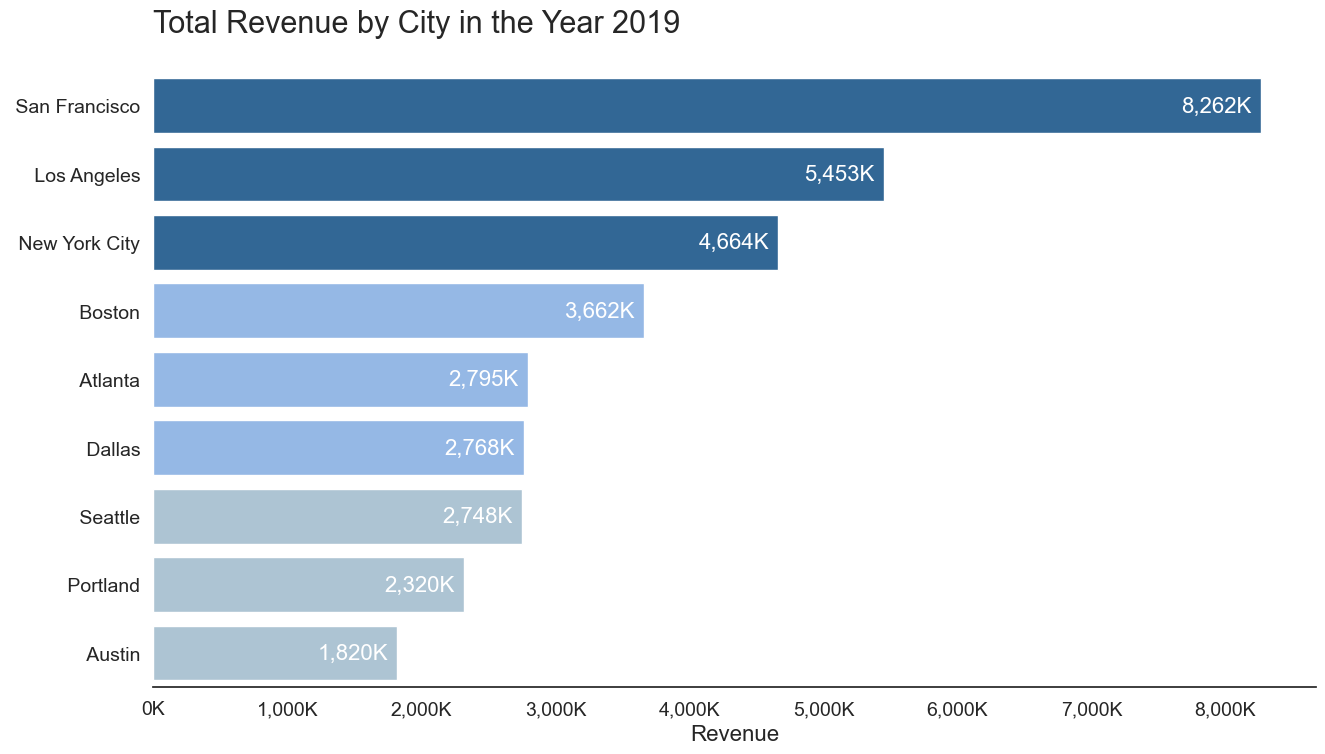

In [33]:
#
sns.set()
sns.set_style('white')
sns.set_palette(["#2168A6", "#2168A6", "#2168A6",
                 "#88B6F2", "#88B6F2", "#88B6F2",
                 "#A7C6D9", "#A7C6D9", "#A7C6D9"])

fig, ax = plt.subplots(figsize=(15, 8))

ax = sns.barplot(x="Revenue", y=revenue_by_city.index, data=revenue_by_city)
sns.despine()
ax.spines["left"].set_visible(False)
ax.set_title("Total Revenue by City in the Year 2019", loc="left", fontsize=22, y=1.05)
plt.xlabel("Revenue", fontsize=16)
plt.ylabel("")
xlabels = ['{:,.0f}'.format(round(x)) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for i in range(len(revenue_by_city.index)):
    plt.text(revenue_by_city.Revenue[i]-70000, i, "{:,.0f}".format(int(round(revenue_by_city.Revenue[i]/1000))) + "K", ha='right', va='center', fontsize=16, color='white')

plt.show()

## What time should we display advertisement to maximize likelihood of customer’s buying product?

We have two major peaks in an entier day, which are located at 12pm and 7pm(or 19). We should display our advertisement starting in the morning from let's say **6am (increasing number already) to 12pm** and **from there until 7pm(or 19)**. In this case we will maximize our likelihood of customer's buying products.

In [34]:
# Orders by hour
orders_by_hour = sales_clean.groupby("Hour")[["Quantity_Ordered"]].sum()

orders_by_hour.head()

,Quantity_Ordered
Hour,
0,4428
1,2619
2,1398
3,928
4,937


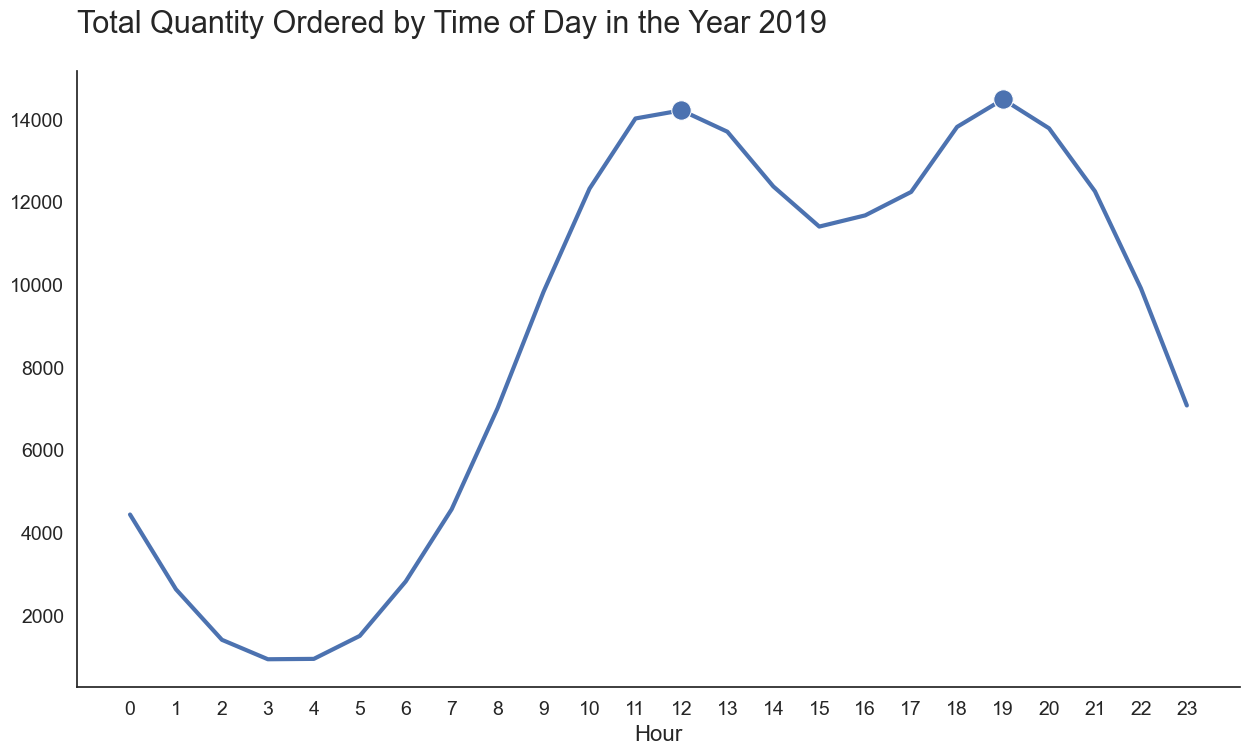

In [36]:

sns.set()
sns.set_style("white")

fig, ax = plt.subplots(figsize=(15, 8))

ax = sns.lineplot(x=orders_by_hour.index, y="Quantity_Ordered", data=orders_by_hour,
                  marker="o", ms=14, markevery=[12,19], ci=None, linewidth=3)
sns.despine()
ax.set_title("Total Quantity Ordered by Time of Day in the Year 2019", loc="left", fontsize=22, y=1.05)
ax.set_xticks([i for i in range(24)])
plt.xlabel("Hour", fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("")
plt.yticks(fontsize=14)

plt.show()

## What products are most often sold together?

This is for when the products are sold in pairing of two products

With a pair of products, we found that the leading pairs were: 1) **iPhone** and **Lightning Charging Cable** with a total of 1,002 transactions, 2) **Google Phone** and **USB-C Charging Cable** with a total of 985 transactions. When customers select an iPhone or Google Phone, we should always include in the recommendation a Lightning Charging Cable or a USB-C Charging respectively.

In [37]:
# Keeping only transactions where Order_ID appears more than once
bought_together = sales_clean[sales_clean["Order_ID"].duplicated(keep=False)]

# Joining the same transactions together
bought_together["Product_Pair"] = bought_together.groupby("Order_ID")["Product"].transform(lambda x: ",".join(x))

# Droping the duplicates
bought_together = bought_together[["Order_ID", "Product_Pair"]].drop_duplicates()


# Counting the number of occurrence for each pair
from itertools import combinations
from collections import Counter

counts = Counter()

for i in bought_together["Product_Pair"]:
    lists = i.split(",")
    counts.update(Counter(combinations(lists, 2)))

    
# Converting the result into a DataFrame for visualization
pair_counts = pd.DataFrame(counts.most_common(10), columns=["Product_Pair", "Pair_Counts"])

pair_counts["Product_Pair"] = [", ".join(i) for i in pair_counts["Product_Pair"]]

pair_counts

,Product_Pair,Pair_Counts
0,"iPhone, Lightning Charging Cable",1005
1,"Google Phone, USB-C Charging Cable",987
2,"iPhone, Wired Headphones",447
3,"Google Phone, Wired Headphones",414
4,"Vareebadd Phone, USB-C Charging Cable",361
5,"iPhone, Apple Airpods Headphones",360
6,"Google Phone, Bose SoundSport Headphones",220
7,"USB-C Charging Cable, Wired Headphones",160
8,"Vareebadd Phone, Wired Headphones",143
9,"Lightning Charging Cable, Wired Headphones",92


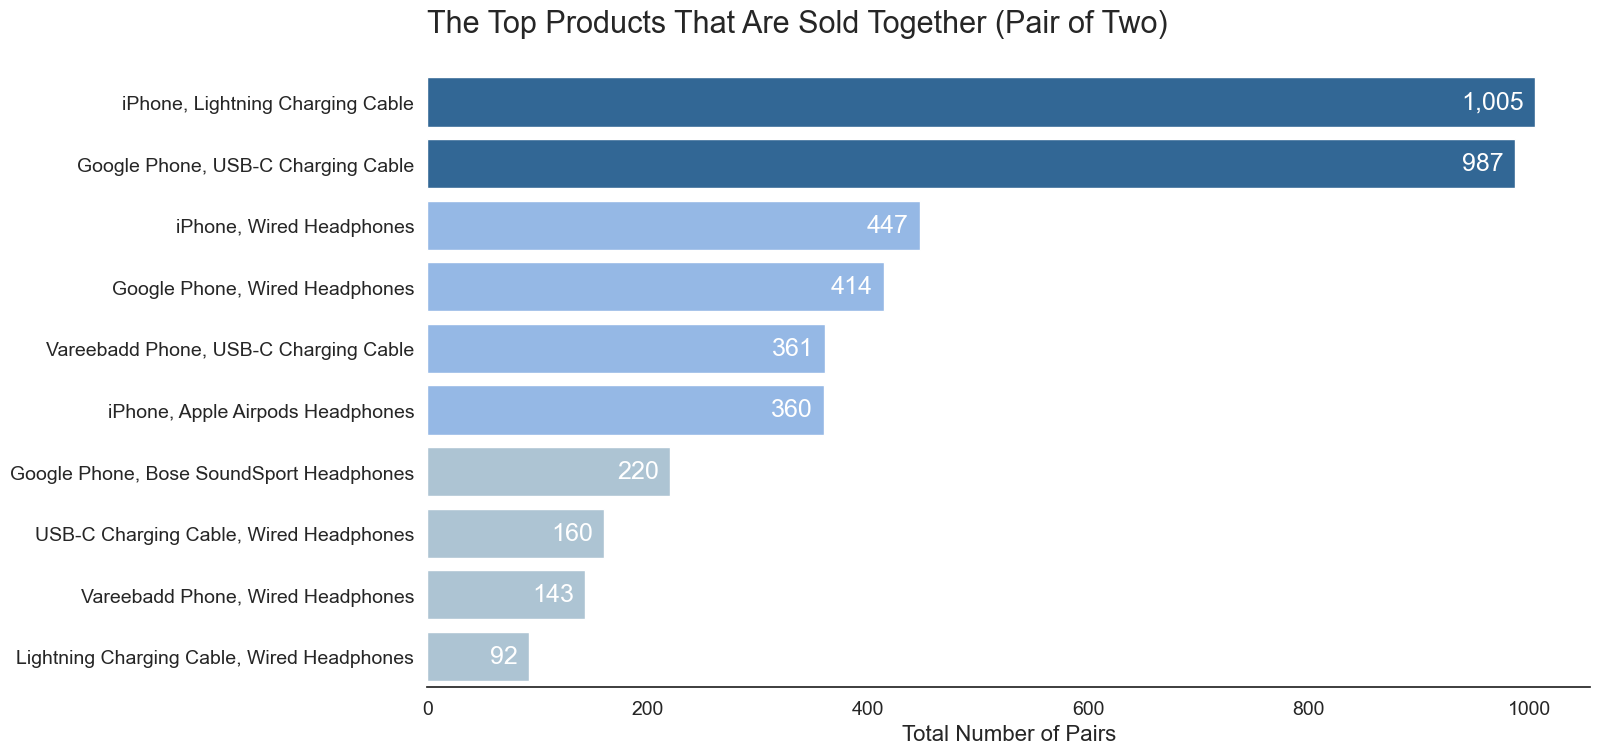

In [38]:
# Visualizing your findings
sns.set()
sns.set_style('white')
sns.set_palette(["#2168A6", "#2168A6",
                 "#88B6F2", "#88B6F2", "#88B6F2", "#88B6F2",
                 "#A7C6D9", "#A7C6D9", "#A7C6D9", "#A7C6D9"])

fig, ax = plt.subplots(figsize=(15, 8))

ax = sns.barplot(x="Pair_Counts", y="Product_Pair", data=pair_counts)
ax.set_title("The Top Products That Are Sold Together (Pair of Two)", loc="left",
             fontsize=22, y=1.05)
sns.despine()
ax.spines["left"].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Total Number of Pairs", fontsize=16)
plt.ylabel("")

for i in range(len(pair_counts.Product_Pair)):
    plt.text(pair_counts.Pair_Counts[i]-10, i, "{:,.0f}".format(int(round(pair_counts.Pair_Counts[i]))), ha='right', va='center', fontsize=18, color='white')

plt.show()

## What product sold the most? Why do you think it sold the most?

The product that sold the most is AAA Batteries (4-pack) with a total order quantity of 31,017, it is followed by AA Batteries (4-pack), USB-C Charging Cable, and Lightning Charging Cable with 27,635, 23,975, and 23,217 total orders. We also observed that the majority of sales for these products is due to their cheapest prices. See Fig below, showing how the cheapest products are the one people buy the most.

In [39]:
sales_by_product = sales_clean.pivot_table(values="Quantity_Ordered", index="Product",
                                             aggfunc=np.sum).sort_values(by="Quantity_Ordered", ascending=False)
sales_by_product["Price_Each"] = [float(sales_clean.loc[sales_clean.Product == i, "Price_Each"].unique()) for i in sales_by_product.index]

sales_by_product = sales_by_product.reset_index()

sales_by_product

,Product,Quantity_Ordered,Price_Each
0,AAA Batteries (4-pack),31017,2.99
1,AA Batteries (4-pack),27635,3.84
2,USB-C Charging Cable,23975,11.95
3,Lightning Charging Cable,23217,14.95
4,Wired Headphones,20557,11.99
5,Apple Airpods Headphones,15661,150.00
6,Bose SoundSport Headphones,13457,99.99
7,27in FHD Monitor,7550,149.99
8,iPhone,6849,700.00
9,27in 4K Gaming Monitor,6244,389.99


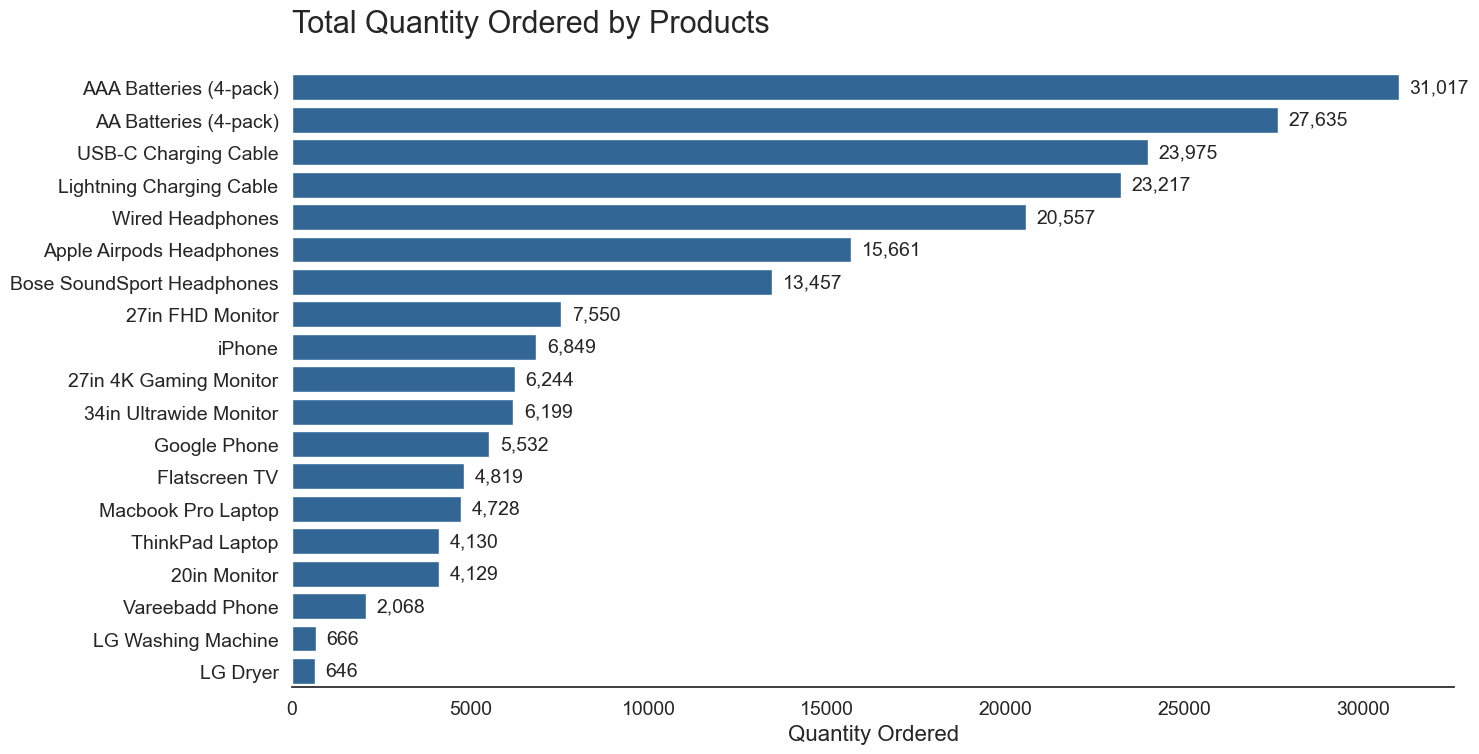

In [40]:
sns.set()
sns.set_style('white')

fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="Quantity_Ordered", y="Product", data=sales_by_product, color="#2168A6")


sns.despine()
ax.spines["left"].set_visible(False)
ax.set_title("Total Quantity Ordered by Products", fontsize=22, loc="left", y=1.05)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Quantity Ordered", fontsize=16)
plt.ylabel("")

for i in range(len(sales_by_product.index)):
    plt.text(sales_by_product.Quantity_Ordered[i]+300, i, "{:,.0f}".format(sales_by_product.Quantity_Ordered[i]),
             ha='left', va='center', fontsize=14)

plt.show()

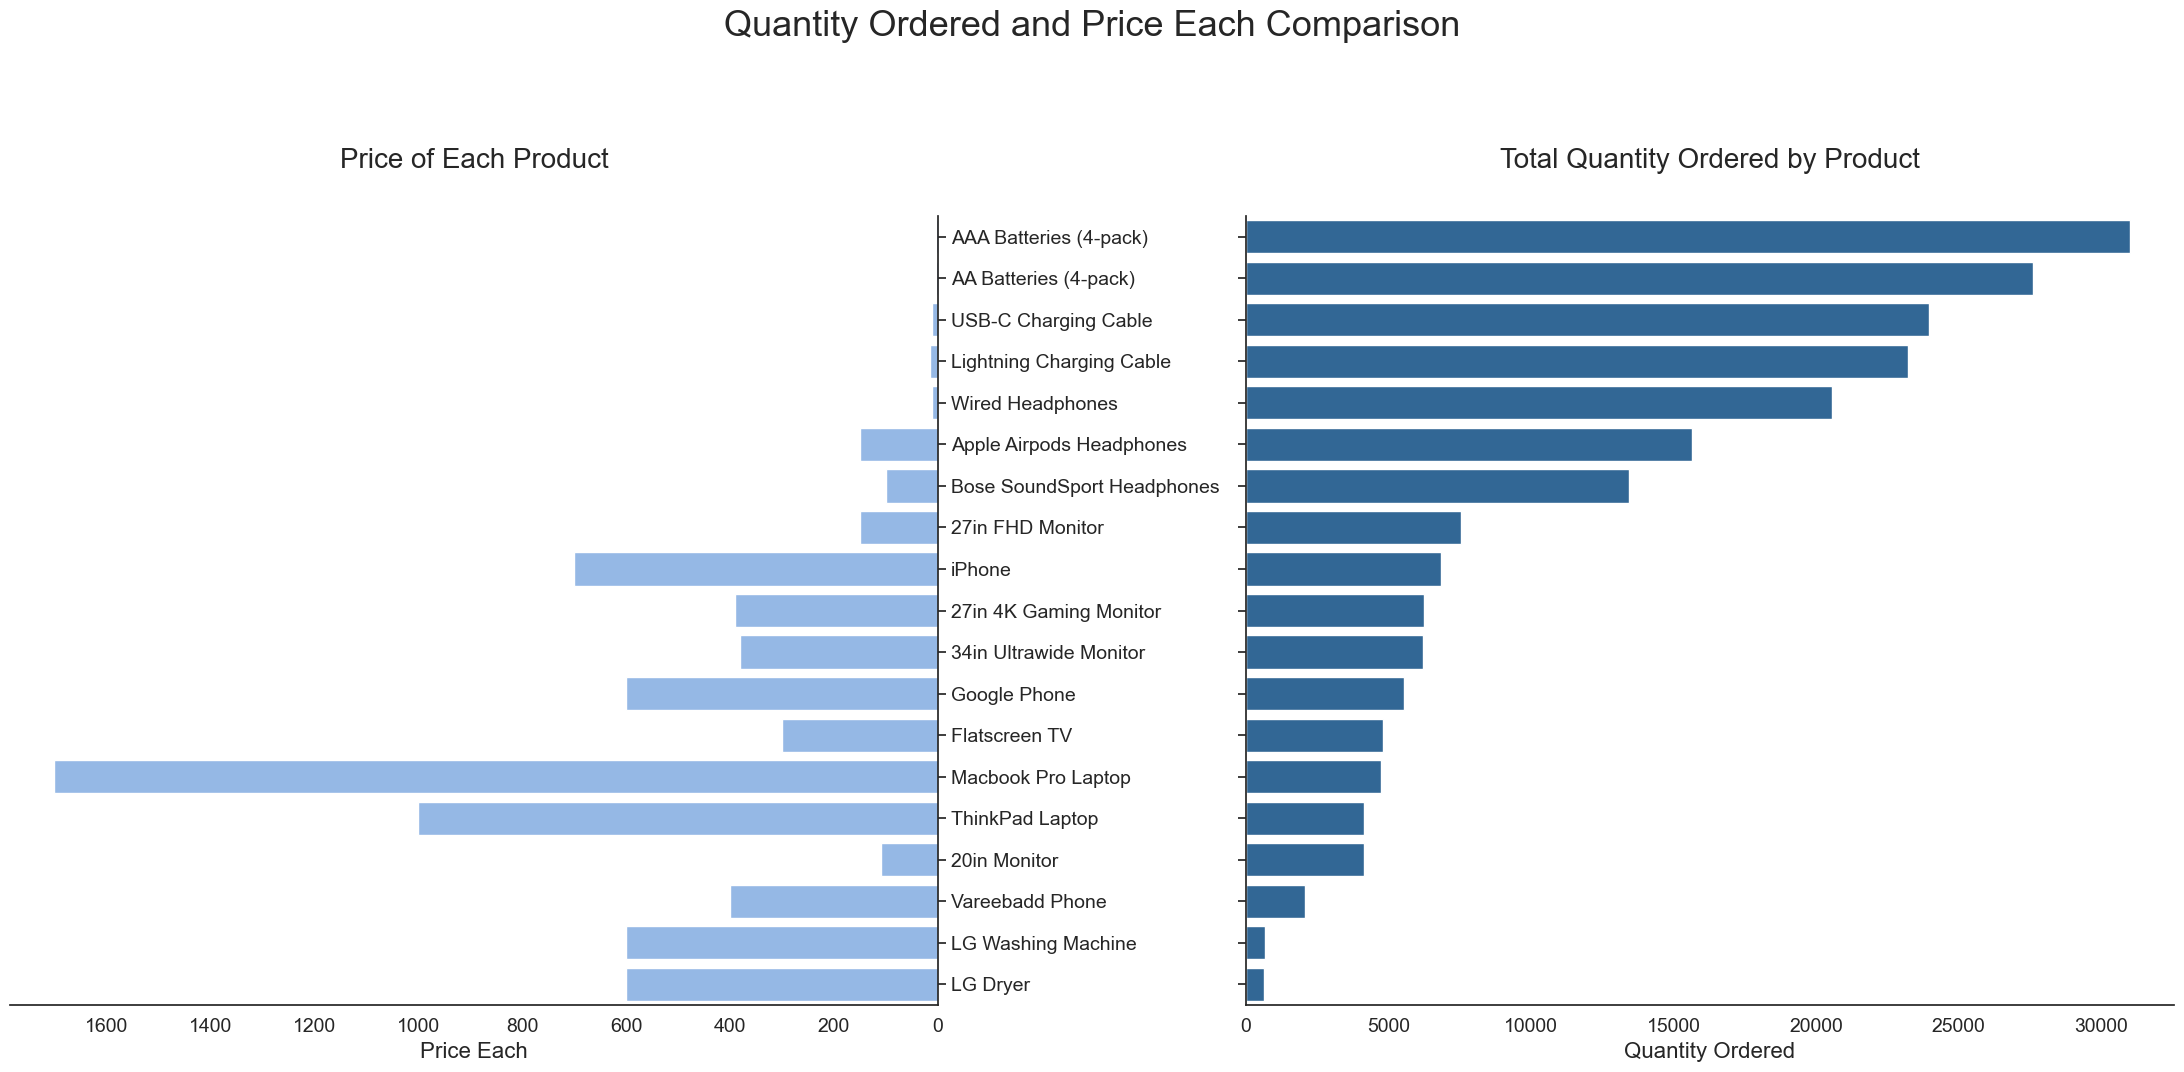

In [42]:

sns.set()
sns.set_style('white')

fig, ax = plt.subplots(1,2, figsize=(22, 10), sharey=True)

a = sns.barplot(x="Quantity_Ordered", y="Product", data=sales_by_product, ax=ax[1], color="#2168A6")
b = sns.barplot(x="Price_Each", y="Product", data=sales_by_product, ax=ax[0], color="#88B6F2")
fig.suptitle("Quantity Ordered and Price Each Comparison", fontsize=26, y=1.07)
# Left Chart (Price Each)
ax[0].set_title("Price of Each Product", fontsize=20, y=1.05)
ax[0].spines["left"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].set_xlabel("Price Each", fontsize=16)
ax[0].set_ylabel("")
ax[0].invert_xaxis()
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].yaxis.tick_right()

ax[1].set_title("Total Quantity Ordered by Product", fontsize=20, y=1.05)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].set_ylabel("")
ax[1].set_xlabel("Quantity Ordered", fontsize=16)
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(left=True)

# Makes enough space between the subplots
fig.tight_layout()

# Show the plots
plt.show()


**Key Insights & Findings**:
- (1) In 2019, the company made a total revenue of **34,492,035 US dollars**.
- (2) The month of **December** was the best in the year 2019 with **4,613K USD** in revenue. We can also observe that January was our weakest month with **1,822K USD** in revenue. See the chart below.
- (3) **San Francisco** was the best city with the highest revenue of **8,262K USD**, followed by Los Angeles and New York City with 5,452K USD and 4,664K USD respectively. We also found that Austin had the least revenue.
- (4) We have two major peaks in an entier day, which are located at 12pm and 7pm(or 19). We should display our advertisement starting in the morning from let's say **6am (increasing number already) to 12pm** and **from there until 7pm(or 19)**. In this case we will maximize our likelihood of customer's buying products.
- (5) With a pair of products, we found that the leading pairs were: 1) **iPhone** and **Lightning Charging Cable** with a total of 1,002 transactions, 2) **Google Phone** and **USB-C Charging Cable** with a total of 985 transactions. When customers select an iPhone or Google Phone, we should always include in the recommendation a Lightning Charging Cable or a USB-C Charging respectively.
- (6) The product that sold the most is **AAA Batteries (4-pack)** with a total order quantity of **31,017**, it is followed by AA Batteries (4-pack), USB-C Charging Cable, and Lightning Charging Cable with 27,635, 23,975, and 23,217 total orders. We also observed that the majority of sales for these products is due to their cheapest prices. See Fig below, showing how the cheapest products are the one people buy the most.
